# <center>Organizaci&oacute;n de Datos</center>
## <center>Trabajo Práctico 1 : Reservas de Hotel</center>
## <center>Checkpoint 3</center>
### <center>Ensambles</center>

#### Integrantes grupo 19: Sudanalytics 
* Adrian Leandro Re
* Alan Toulouse
* Luciano Lorenzo
* Nicolas Tonizzo

## Ensamble híbrido
Cargaremos los modelos creados con las notebooks anteriores usando la libreria pickle

In [33]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

decision_tree = pickle.load(open('../modelos/decision_tree.pickle', 'rb'))
rf = pickle.load(open('../modelos/rf.pickle', 'rb'))
xgb = pickle.load(open('../modelos/xgb.pickle', 'rb'))
svm = pickle.load(open('../modelos/svm.pickle', 'rb'))
# knn = pickle.load(open('../modelos/knn.pickle', 'rb'))

In [34]:
df = pd.read_csv("../dataset/hotels_train_procesado.csv")
df.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date', 'id', 'is_canceled', 'hotel_encoding',
       'tiene_hijos', 'es_extranjero', 'es_portugues', 'es_ingles',
       'es_frances', 'es_espanol', 'es_aleman', 'reserved_room_was_assigned',
       'required_a_car_parking_space', 'solo_desayuna_en_el_hotel',
       'pidio_todas_comidas', 'reservo_online', 'reservo_en_grupo',
       'reservo_sin_reembols

Declaramos el target y los features del dataframe que vamos a utilizar para predecir.

In [35]:
target = "is_canceled"

attrs = [
    "hotel_encoding",
    
    "lead_time",
    "reservo_el_mismo_dia",
    "adr",

    "stays_in_weekend_nights",
    "stays_in_week_nights",

    "tiene_hijos",
    "adults",
    #"children",
    #"babies",

    # Fechas
    "arrival_date_week_number",
    "arrival_date_day_of_month",
    "arrival_date_year",

    "es_extranjero",
    "es_portugues",
    "es_ingles",
    "es_frances",
    "es_espanol",
    "es_aleman",

    "reserved_room_was_assigned",

    "is_repeated_guest",
    "previous_cancellations", 
    "previous_bookings_not_canceled",
    "total_reservas_previas",
    "total_of_special_requests",
    "booking_changes",

    # 'meal',
    "solo_desayuna_en_el_hotel",
    "pidio_todas_comidas",

    'required_car_parking_spaces',
    "required_a_car_parking_space",

    "reservo_sin_reembolso",
    "reservo_sin_depositar",
    "reservo_online",
    "reservo_en_grupo",
    "reservo_sin_compania",
    "reservo_sin_agente",
    "reservo_sin_paquete",
    
    "days_in_waiting_list",
    "tuvo_dias_de_espera",
    
    "agent9",
    "agent240",
    "agent1",
    "agent14",
    "agent6",
]

**Dividimos el dataset en entrenamiento y validacion**, para poder validar que no estamos overfitteando al dataset de entrenamiento, y que el modelo predice bien a registros no vistos anteriormente. 

In [36]:
X = df[attrs]
y = df[target]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, shuffle=True)

Construimos nuestro ensamble de tipo Voting, con los modelos que entrenamos en las notebooks anteriores

In [37]:
# ensamble_hibrido = VotingClassifier(estimators=[('xgb', xgb), ('rf', rf), ('decision_tree', decision_tree), ('svm', svm), ('knn', knn)], voting='hard')
ensamble_hibrido = VotingClassifier(estimators=[('xgb', xgb), ('rf', rf), ('decision_tree', decision_tree)], voting='hard')

Lo entrenamos con los datos separados anteriormente

In [38]:
ensamble_hibrido.fit(X_train, y_train)

/home/adrian/.local/lib/python3.8/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


VotingClassifier(estimators=[('xgb',
                              RandomizedSearchCV(cv=3,
                                                 estimator=XGBClassifier(base_score=None,
                                                                         booster=None,
                                                                         callbacks=None,
                                                                         colsample_bylevel=None,
                                                                         colsample_bynode=None,
                                                                         colsample_bytree=None,
                                                                         early_stopping_rounds=None,
                                                                         enable_categorical=False,
                                                                         eval_metric=None,
                                                                         feature_types=None,
                                                                         gamma=None,
                                                                         gpu_id=None,
                                                                         grow_policy=None,
                                                                         importance_type=None,
                                                                         intera...
                                                 param_distributions={'colsample_bytree': [0.6,
                                                                                           0.7,
                                                                                           0.8,
                                                                                           0.9,
                                                                                           1],
                                                                      'max_depth': [10,
                                                                                    11,
                                                                                    12,
                                                                                    13,
                                                                                    14,
                                                                                    15],
                                                                      'subsample': [0.6,
                                                                                    0.7,
                                                                                    0.8,
                                                                                    0.9,
                                                                                    1]},
                                                 scoring=make_scorer(f1_score))),
                             ('rf',
                              RandomForestClassifier(min_samples_split=4,
                                                     n_estimators=50, n_jobs=-1,
                                                     oob_score=True,
                                                     random_state=2)),
                             ('decision_tree',
                              DecisionTreeClassifier(ccp_alpha=0.00015816326530612246,
                                                     max_depth=22,
                                                     min_samples_leaf=16,
                                                     min_samples_split=16))])

Analizamos el f1 score separando por los sets de validación y entrenamiento

In [39]:
print("f1 score sobre validacion: ", f1_score(y_val, ensamble_hibrido.predict(X_val)))
print("f1 score sobre train: ", f1_score(y_train, ensamble_hibrido.predict(X_train)))

f1 score sobre validacion:  0.8865462492768529
f1 score sobre train:  0.9861966171991445


Ploteamos la confusion matrix del set de entrenamiento

Text(0.5, 1.0, 'Confusion matrix de training set')

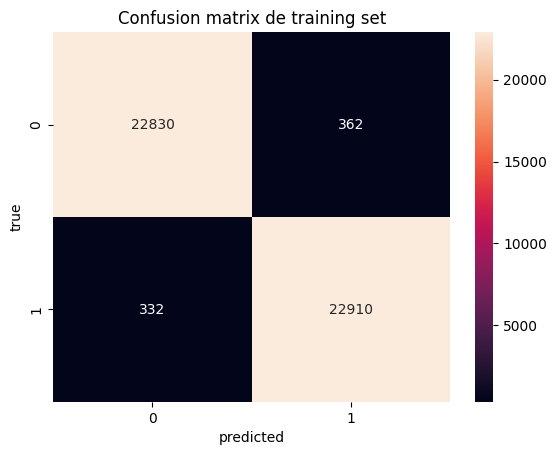

In [18]:
y_pred = ensamble_hibrido.predict(X_train)
confusion = confusion_matrix(y_train, y_pred)
sns.heatmap(confusion, annot=True, fmt='.0f')
plt.ylabel('true')
plt.xlabel('predicted')
plt.title("Confusion matrix de training set")

Ploteamos la confusion matrix del set de validación

precision 0.8791963707064161
recall 0.8810235095466944


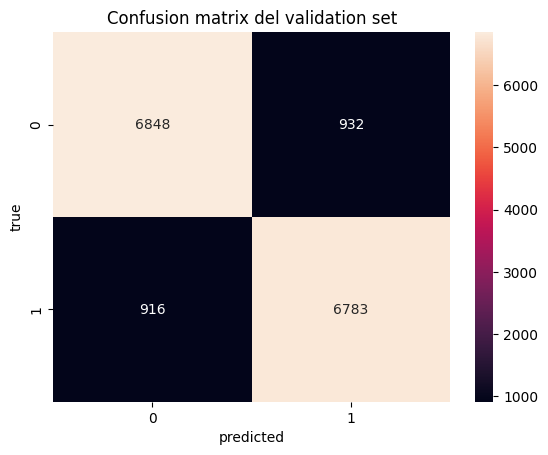

In [14]:
y_pred = ensamble_hibrido.predict(X_val)
confusion = confusion_matrix(y_val, y_pred)
sns.heatmap(confusion, annot=True, fmt='.0f')
plt.ylabel('true')
plt.xlabel('predicted')
plt.title("Confusion matrix del validation set")
print("precision", precision_score(y_val, y_pred))
print("recall", recall_score(y_val, y_pred))

# Creacion de submit

In [40]:
def create_submission(model): 
    df_test = pd.read_csv("../dataset/hotels_test_procesado.csv")
    assert(len(df_test)==26535)

    prediccion = model.predict(df_test[attrs].values)
    assert(len(prediccion)==26535)

    submit = pd.DataFrame(
        {"is_canceled": prediccion},
        index=df_test["id"],
    )
    assert(len(submit)==26535)

    submit.to_csv("../dataset/submit.csv")

In [41]:
create_submission(ensamble_hibrido)

/home/adrian/.local/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/adrian/.local/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Guardando el modelo con pickle
Guardamos el ensamble hibrido usando la libreria pickle

In [12]:
with open('../modelos/hibrido.pickle', 'wb') as file:
    pickle.dump(ensamble_hibrido, file)